# About¶
## Experiment Info
- Model: GSR
- Date: 2021-05-15 23:21:27 
- TOMG (Task of Maximum Gradient): 
- Background:
    - 1
    
- Exp Purpose:
    - 1
    
## Settings

- n_layer = 2
- train_percentage = 5

In [1]:
src_folder = '/Users/wenqianlong/Desktop/MGSL-master/'
plt_folder = 'notebooks/res2plot/'
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
sys.path.append(src_folder + 'src')
os.chdir(src_folder)
import seaborn as sns
from utils.proj_settings import EVAL_METRIC
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 10)
sns.set_theme()

p_order = [0, 5]
fan_order = ['1_2', '1000_2500']

fsim_order = [0, 0.25, 0.5, 0.75, 1]

sr, er = 0.99, 1.01


In [2]:
f_name = f'{plt_folder}May15/cora/GSR_cora<l05><RoughTune>83.01'+'.xlsx'
df = pd.read_excel(f_name).drop(columns=['Unnamed: 0'])
metric_names = [cname[4:] for cname in df.columns if 'avg' in cname]
df[EVAL_METRIC] = df[EVAL_METRIC].apply(
    lambda x: float(x.split('±')[0])).astype(float)

df


,model,dataset,exp_name,train_percentage,p_epochs,fan_out,fsim_weight,add_ratio,rm_ratio,batch_size,test_acc,val_acc,test_maf1,test_mif1,best_epoch,config2str
0,GSR,cora,RoughTune,5,5,1_2,0.50,0.50,0.0,128,83.01,79.21±0.18,81.54±0.15,83.01±0.12,235.00±94.91,"{'_interested_conf_list': ['model', 'dataset',..."
1,GSR,cora,RoughTune,5,5,1_2,0.25,0.75,0.0,128,82.93,79.75±0.09,81.24±0.09,82.93±0.09,218.00±19.16,"{'_interested_conf_list': ['model', 'dataset',..."
2,GSR,cora,RoughTune,5,5,1_2,0.00,1.00,0.0,128,82.83,80.30±0.05,80.98±0.07,82.83±0.08,260.67±61.46,"{'_interested_conf_list': ['model', 'dataset',..."
3,GSR,cora,RoughTune,5,5,1000_2500,0.25,0.25,0.0,128,82.67,78.90±0.37,81.19±0.43,82.67±0.47,174.33±40.70,"{'_interested_conf_list': ['model', 'dataset',..."
4,GSR,cora,RoughTune,5,5,1_2,0.00,0.75,0.0,128,82.62,79.26±0.33,80.73±0.10,82.62±0.12,204.67±73.08,"{'_interested_conf_list': ['model', 'dataset',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,GSR,cora,RoughTune,5,5,1_2,1.00,0.75,0.4,128,61.36,60.26±0.13,57.72±0.11,61.36±0.23,406.33±170.02,"{'_interested_conf_list': ['model', 'dataset',..."
396,GSR,cora,RoughTune,5,5,1_2,1.00,0.50,0.6,128,57.47,56.35±0.12,52.26±0.14,57.47±0.25,132.33±38.21,"{'_interested_conf_list': ['model', 'dataset',..."
397,GSR,cora,RoughTune,5,5,1_2,1.00,1.00,0.4,128,56.30,56.97±0.12,49.52±0.73,56.30±0.09,153.33±34.27,"{'_interested_conf_list': ['model', 'dataset',..."
398,GSR,cora,RoughTune,5,5,1_2,1.00,0.75,0.6,128,53.61,53.21±0.25,48.56±0.20,53.61±0.31,182.33±19.60,"{'_interested_conf_list': ['model', 'dataset',..."


# Pretrain是否有用
## 'fan_out'=="1_2"

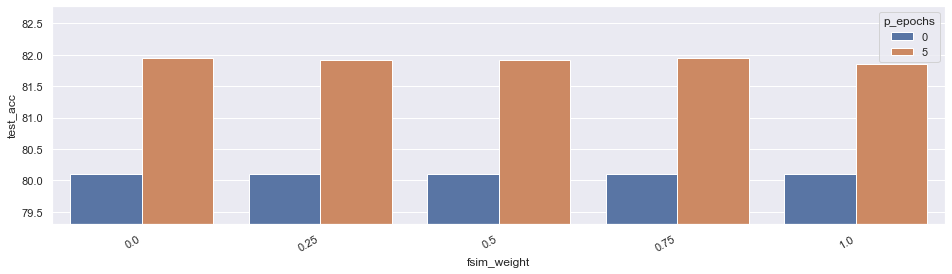

In [3]:
s_df = df[df['fan_out']=="1_2"]
s_df = s_df.query('add_ratio==0 and rm_ratio==0 ', engine='python')

ax = sns.barplot(data=s_df, x='fsim_weight', y=EVAL_METRIC, hue="p_epochs", hue_order=p_order)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=30,
                   horizontalalignment='right')

min_val = s_df.test_acc.values.min()
max_val = s_df.test_acc.values.max()
val_range = (min_val*sr, max_val*er)
ax.set_ylim(val_range)
ax.figure.set_figwidth(16.0)

## 'fan_out'=="1000_2500"

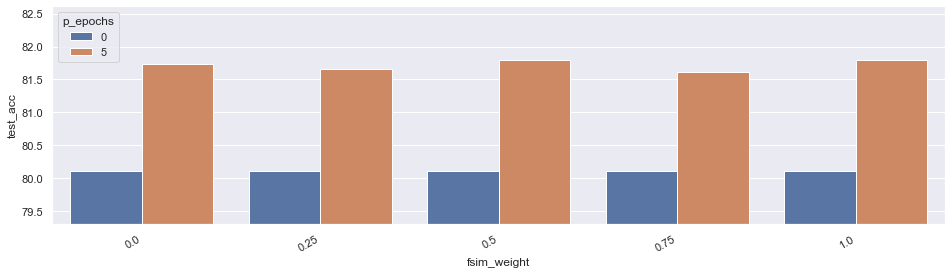

In [4]:
s_df = df[df['fan_out']=="1000_2500"]
s_df = s_df.query('add_ratio==0 and rm_ratio==0 ', engine='python')

ax = sns.barplot(data=s_df, x='fsim_weight', y=EVAL_METRIC, hue="p_epochs", hue_order=p_order)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=30,
                   horizontalalignment='right')

min_val = s_df.test_acc.values.min()
max_val = s_df.test_acc.values.max()
val_range = (min_val*sr, max_val*er)
ax.set_ylim(val_range)
ax.figure.set_figwidth(16.0)

## 结论—— Pretrain 确实有用
# GraphRefine FeatureSimliartyWeight
## add_ratio==1 and rm_ratio==0 小的好

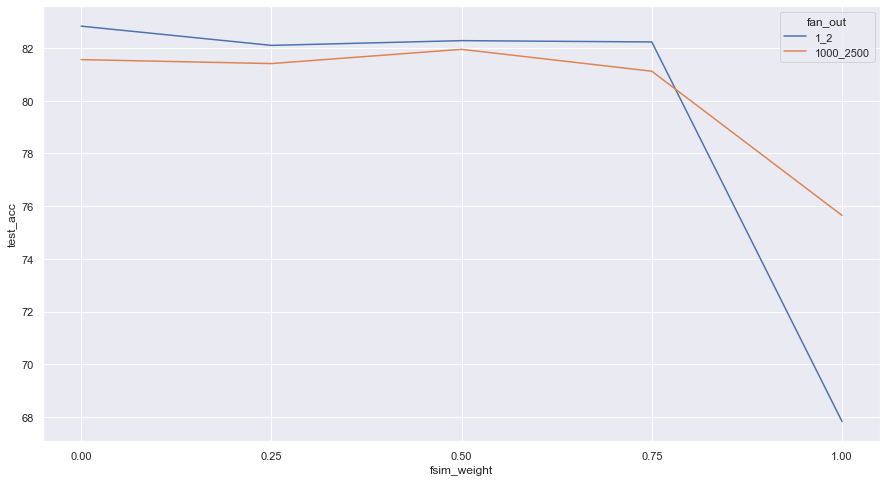

In [5]:
xticks = [0.0, 0.25, 0.5, 0.75, 1.0]
f_sim_df = df.query('add_ratio == 1 and rm_ratio==0 and p_epochs==5', engine='python')
ax = sns.lineplot(data=f_sim_df, x='fsim_weight', y=EVAL_METRIC, hue='fan_out')
ax.set_xticks(xticks)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

## 结论 增边有效

- Feature 和 Structural 邻居都有用
- label rate增加的情况下小子图(fanout1_2)仍比全部邻居要好，一定程度上增加任务难度确实有用

# 增边实验

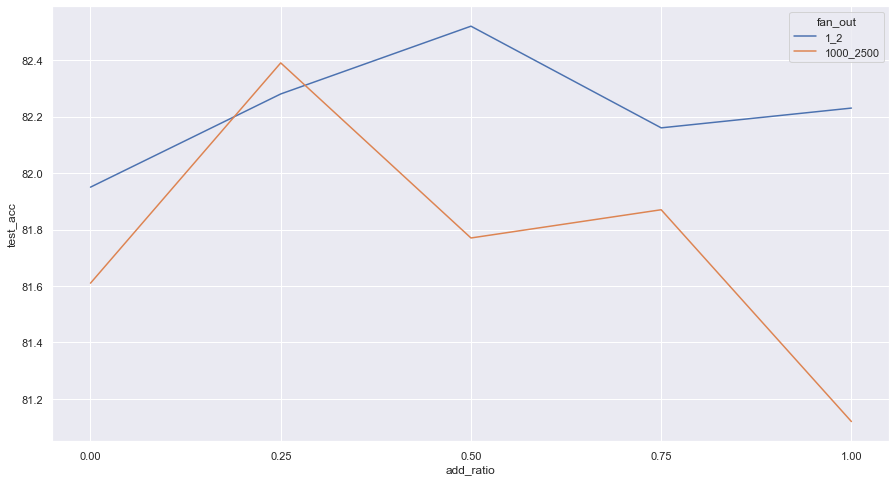

In [6]:
xticks = [0.0, 0.25, 0.5, 0.75, 1.0]
add_edge_df = df.query('fsim_weight == 0.75 and rm_ratio==0 and p_epochs==5', engine='python')
ax = sns.lineplot(data=add_edge_df, x='add_ratio', y=EVAL_METRIC, hue='fan_out')
ax.set_xticks(xticks)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

## 结论
- 增边有效果（大图和小图）
- 小子图(fanout1_2)基本比全部邻居要好（更难的任务）

# 剪边实验

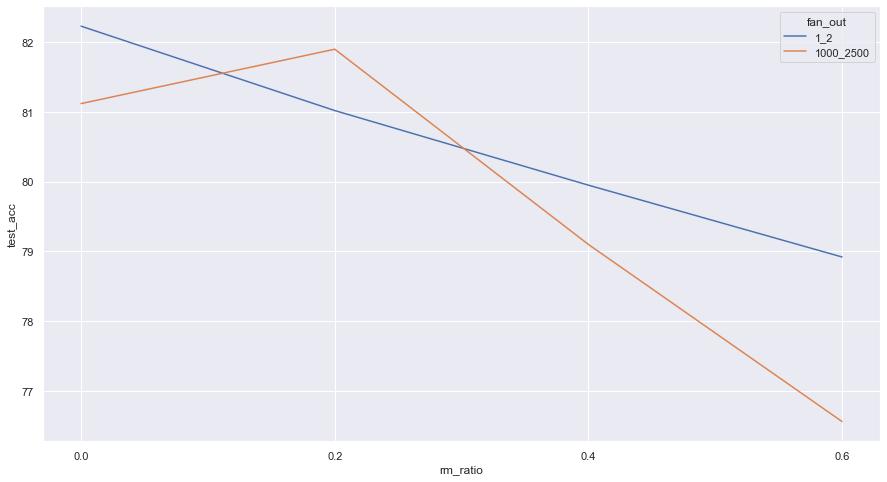

In [7]:
rm_edge_df = df.query('fsim_weight == 0.75 and add_ratio==1 and p_epochs==5', engine='python')
xticks = [0, 0.2, 0.4, 0.6]
ax = sns.lineplot(data=rm_edge_df, x='rm_ratio', y=EVAL_METRIC, hue='fan_out')
ax.set_xticks(xticks)
ax.figure.set_figwidth(15.0)
ax.figure.set_figheight(8.0)

## 结论 剪边没效果
- 大图的减边竟然有一定效果（0.2），可能是偶然？
- 总体效果小子图(fanout1_2)仍然比全部邻居要好